## The Machine Learning And Deep Learning Show

## by Akanksha

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv("Data/glass.csv")
dataset.fillna(0)
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
dataset.corr()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
RI,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010,-0.164237
Na,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346,0.502898
Mg,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060,-0.744993
Al,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402,0.598829
Si,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201,0.151565
K,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719,-0.010054
Ca,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968,0.000952
Ba,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692,0.575161
Fe,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000,-0.188278
Type,-0.164237,0.502898,-0.744993,0.598829,0.151565,-0.010054,0.000952,0.575161,-0.188278,1.000000


Top correlation between columns:
* **Type [-1]** vs **Na [1]**: 0.5
* **Type [-1]** vs **Al [3]**: 0.6
* **Type[-1]** vs **Ba [-3]**: 0.57

In [5]:
X = dataset.iloc[:, [1, 3, -3] ]
Y = dataset.iloc[ :, [-1] ]

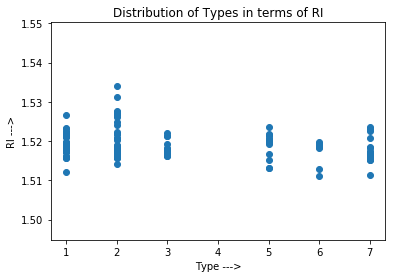

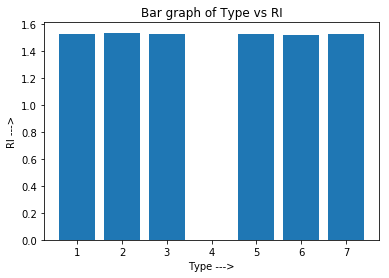

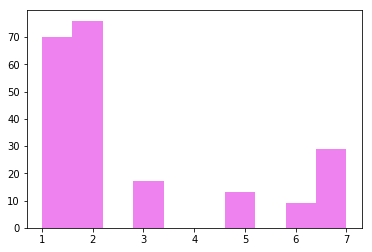

In [6]:
plt.scatter(dataset["Type"], dataset["RI"])
plt.xlabel("Type --->")
plt.ylabel("RI --->")
plt.title("Distribution of Types in terms of RI")
plt.show()
plt.bar(dataset["Type"], dataset["RI"])
plt.xlabel("Type --->")
plt.ylabel("RI --->")
plt.title("Bar graph of Type vs RI")
plt.show()
plt.hist(dataset["Type"], color = "violet")
plt.show()

## Split

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test= train_test_split(X,Y, test_size=0.1)

## Logistics Regression

In [8]:
from sklearn.linear_model import LogisticRegression
logclass= LogisticRegression()
logclass.fit(X_train, Y_train)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [9]:
pred_log=logclass.predict(X_test)

In [10]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred_log)

array([[2, 2, 0, 0, 0, 0],
       [6, 4, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 2]])

In [11]:
acc_log = logclass.score(X_test, Y_test)
acc_log

0.36363636363636365

## KNN Classifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier()
knn.fit(X_train, Y_train)
Y_pred= knn.predict(X_test)

/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  app.launch_new_instance()


In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)

array([[4, 0, 0, 0, 0, 0],
       [5, 5, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 2]])

In [14]:
acc_KNN = knn.score(X_test,Y_test)
acc_KNN

0.5

## Decision Tree Classifier

In [15]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train,Y_train)
pred_DT=DT.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred_DT)

array([[4, 0, 0, 0, 0, 0],
       [6, 3, 1, 0, 0, 0],
       [0, 1, 0, 0, 0, 1],
       [0, 2, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 1]])

In [17]:
acc_DT = DT.score(X_test,Y_test)
acc_DT

0.36363636363636365

## Random Forest Classifier

In [18]:
from sklearn.ensemble import RandomForestClassifier
Rf=RandomForestClassifier()
Rf.fit(X_train,Y_train)
pred_rf=Rf.predict(X_test)



/home/nbuser/anaconda3_420/lib/python3.5/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/home/nbuser/anaconda3_420/lib/python3.5/site-packages/ipykernel/__main__.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  app.launch_new_instance()


In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred_rf)

array([[4, 0, 0, 0, 0, 0],
       [4, 3, 2, 0, 1, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 1, 0, 0, 1]])

In [20]:
acc_rf = Rf.score(X_test, Y_test)
acc_rf

0.36363636363636365